# Dataset Context and Exploration

**age**  
- Demographic: Age  
- Description: How old is this sample of people  
- Data Type: Integer  
- Missing Values: No  

**workclass**  
- Demographic: Income  
- Description: Employment classification  
- Possible values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  
- Data Type: Categorical  
- Missing Values: Yes  

**fnlwgt**  
- Demographic:  
- Description: Final weight representing the number of people the census believes the entry represents  
- Data Type: Integer  
- Missing Values: No  

**education**  
- Demographic: Education Level  
- Description: Highest level of education achieved  
- Possible values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool  
- Data Type: Categorical  
- Missing Values: No  

**education-num**  
- Demographic: Education Level  
- Description: Numeric representation of education level  
- Data Type: Integer  
- Missing Values: No  

**marital-status**  
- Demographic: Other  
- Description: Marital status of the individual  
- Possible values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse  
- Data Type: Categorical  
- Missing Values: No  

**occupation**  
- Demographic: Other  
- Description: Type of job  
- Possible values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces  
- Data Type: Categorical  
- Missing Values: Yes  

**relationship**  
- Demographic: Other  
- Description: Relationship within household  
- Possible values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried  
- Data Type: Categorical  
- Missing Values: No  

**race**  
- Demographic: Race  
- Description: Race of the individual  
- Possible values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black  
- Data Type: Categorical  
- Missing Values: No  

**sex**  
- Demographic: Sex  
- Description: Gender of the individual  
- Possible values: Female, Male  
- Data Type: Binary  
- Missing Values: No  

**capital-gain**  
- Demographic:  
- Description: Income from capital gains  
- Data Type: Integer  
- Missing Values: No  

**capital-loss**  
- Demographic:  
- Description: Capital losses  
- Data Type: Integer  
- Missing Values: No  

**hours-per-week**  
- Demographic:  
- Description: Number of hours worked per week  
- Data Type: Integer  
- Missing Values: No  

**native-country**  
- Demographic: Other  
- Description: Country of origin  
- Possible values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands  
- Data Type: Categorical  
- Missing Values: Yes  

**income**  
- Demographic: Income  
- Description: Income class  
- Possible values: >50K, <=50K  
- Data Type: Binary  
- Missing Values: No  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Missing Values

In [2]:
df = pd.read_csv('base_data/adultdataset.csv', na_values='NaN', skipinitialspace=True)

#Identify and count the number of missing values in each column, the missing values are repesented by "NaN"
missing_values = df.isna().sum()
print(missing_values)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


# Total fnlwgt

The fnlwgt represent the wheight a certain row has over the whole dataset, this works like a percentage.
From this point forward if we discribe something as wheighted it means that it wheighted to the total fnlwgt

In [3]:
total_fnlwgt = df['fnlwgt'].sum()
print(total_fnlwgt)


9263575662


# Wheighted Age Distribution

In [4]:
age_bins = [(17, 26), (27, 36), (37, 46), (47, 56), (57, 66), (67, 76), (77, 86), (87, 99)]

age_distribution = (df.groupby('age')['fnlwgt'].sum() / total_fnlwgt).to_dict()

# Aggregate into custom age ranges
age_ranges = {}
for start, end in age_bins:
    label = f'{start}-{end}'
    age_ranges[label] = sum(age_distribution.get(age, 0) for age in range(start, end + 1))

print(age_ranges)

{'17-26': 0.23254280804728858, '27-36': 0.27141756733459493, '37-46': 0.23722836582580933, '47-56': 0.15117445207951713, '57-66': 0.07870687525021912, '67-76': 0.02373170685071477, '77-86': 0.004034587978086513, '87-99': 0.001163636633769635}


# Wheighted Education Distribution

In [5]:

education_distribution = (df.groupby('education')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(education_distribution)

{'10th': 0.029468504815025498, '11th': 0.03816294386736559, '12th': 0.01400998833877717, '1st-4th': 0.0062664863027056044, '5th-6th': 0.012629909796056028, '7th-8th': 0.019338862285637366, '9th': 0.016240940376528228, 'Assoc-acdm': 0.03347668679083759, 'Assoc-voc': 0.0399183750953639, 'Bachelors': 0.163176883759985, 'Doctorate': 0.011804269538010278, 'HS-grad': 0.32139634430936437, 'Masters': 0.0520525309657691, 'Preschool': 0.0021408804465594703, 'Prof-school': 0.016798332164364632, 'Some-college': 0.22311806114765018}


# Wheighted Race Distribution

In [6]:

race_distribution = (df.groupby('race')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(race_distribution)

{'Amer-Indian-Eskimo': 0.00609399275827926, 'Asian-Pac-Islander': 0.026202793700461278, 'Black': 0.11656649596219383, 'Other': 0.008577742860778288, 'White': 0.8425589747182873}


# Wheighted Native Country Distribuition

In [7]:
ncountry_distribution = (df.groupby('native-country')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(ncountry_distribution)

{'Cambodia': 0.0006054133095717787, 'Canada': 0.0035612337183499113, 'China': 0.002275493585750992, 'Columbia': 0.001998964619672796, 'Cuba': 0.003584282917470276, 'Dominican-Republic': 0.002264667852399304, 'Ecuador': 0.000867478746135166, 'El-Salvador': 0.004194289701695103, 'England': 0.0025167153430435273, 'France': 0.0007650541495625774, 'Germany': 0.004291807337752816, 'Greece': 0.000795958306925307, 'Guatemala': 0.0024352646130521775, 'Haiti': 0.0017626972128033124, 'Holand-Netherlands': 3.009852892374422e-06, 'Honduras': 0.0005169305217253592, 'Hong': 0.0006895137723332388, 'Hungary': 0.00040688543360871404, 'India': 0.0026994449996861265, 'Iran': 0.0012345983254516651, 'Ireland': 0.000583518308397231, 'Italy': 0.0020298072457196714, 'Jamaica': 0.002418630971181892, 'Japan': 0.0019346626674100781, 'Laos': 0.0005085181113512882, 'Mexico': 0.02920982867446892, 'Nicaragua': 0.0015055085108452585, 'Outlying-US(Guam-USVI-etc)': 0.00046019119997985937, 'Peru': 0.0013488914492551592, 

# Wheighted Workclass Distribution

In [8]:
workclass_distribution = (df.groupby('workclass')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(workclass_distribution)

{'Federal-gov': 0.028380069488549937, 'Local-gov': 0.06437528452930555, 'Never-worked': 0.00023212775265828018, 'Private': 0.7051966278850047, 'Self-emp-inc': 0.03275067868712141, 'Self-emp-not-inc': 0.07319917748192728, 'State-gov': 0.03890616400732109, 'Without-pay': 0.00038062581109622506}


# Wheighted Income Distribution

In [9]:
income_distribution = (df.groupby('income')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(income_distribution)

{'<=50K': 0.7622240390354357, '>50K': 0.2377759609645643}


# Wheighted Sex Distribution

In [10]:
sex_distribution = (df.groupby('sex')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(sex_distribution)

{'Female': 0.32424719304894256, 'Male': 0.6757528069510574}


# Wheighted Relationship Distribution

In [11]:
relationship_distribution = (df.groupby('relationship')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(relationship_distribution)

{'Husband': 0.39841025891757864, 'Not-in-family': 0.25856131437726904, 'Other-relative': 0.03308744508422627, 'Own-child': 0.15858494253209673, 'Unmarried': 0.10587409719372355, 'Wife': 0.04548194189510577}


# Wheighted Average Hours per Weak Distribution

In [12]:
hours_per_week_distribution = (df.groupby('hours-per-week')['fnlwgt'].sum() / total_fnlwgt).to_dict()
print(hours_per_week_distribution)
sorted_hours_per_week = dict(sorted(hours_per_week_distribution.items(), key=lambda item: item[1], reverse=True))
print(sorted_hours_per_week)

hours_per_week_distribution_grouped = {"<40":0, "40":0, ">40":0}
for key, value in hours_per_week_distribution.items():
    if key < 40:
        hours_per_week_distribution_grouped["<40"] += value
    elif key == 40:
        hours_per_week_distribution_grouped["40"] += value
    else:
        hours_per_week_distribution_grouped[">40"] += value
print(hours_per_week_distribution_grouped)


average_hours_per_week = 0
for key, value in hours_per_week_distribution.items():
    average_hours_per_week += key * value
print("Average Hours:" , average_hours_per_week)

{1: 0.0005355909187801483, 2: 0.001110879143807656, 3: 0.0011775734768106653, 4: 0.001502640719727734, 5: 0.001782997041601753, 6: 0.0017477536310751623, 7: 0.0008876964252294569, 8: 0.004306831773788993, 9: 0.0005425860578457053, 10: 0.00822093884464027, 11: 0.00029105478255659766, 12: 0.00464480234954009, 13: 0.0005934932903449739, 14: 0.001068289757765461, 15: 0.012683411491090814, 16: 0.005952873923857416, 17: 0.0009196336610004795, 18: 0.002499484415610746, 19: 0.00037384246929681955, 20: 0.03775265175785208, 21: 0.0009668757860683624, 22: 0.0012101099412383685, 23: 0.000869856013920686, 24: 0.007465276748769972, 25: 0.020016737139702544, 26: 0.0008324194977574308, 27: 0.0008371259957222337, 28: 0.0029465861775135357, 29: 0.0003484678182358651, 30: 0.035563565627408374, 31: 0.00024778768844258833, 32: 0.008798474473991942, 33: 0.0013127072572940571, 34: 0.0009296414596500113, 35: 0.039750254268501276, 36: 0.007376472162936601, 37: 0.004874414119077986, 38: 0.014070435839875153, 39

# Class Balance of the Dataset

Check the distribution of the target variable (the class you’re trying to predict).

In [13]:
df['income'].value_counts(normalize=True)


income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

## **Preprocessing the Dataset**

In this section, we handle the preprocessing of the Adult Income dataset to prepare it for machine learning.

### **Handling Missing Values**

The dataset contains some missing values, represented as `"NaN"`, particularly in categorical features like `workclass`, `occupation`, and `native-country`. We will address them using two strategies:

- **Removing rows with missing values** to eliminate uncertainty.
- **Replacing missing values** with the most frequent value (mode) in the respective column.

In [14]:
columns = ['workclass', 'occupation', 'native-country']

for col in columns:
    mode_value = df[col].mode()[0]
    mode_count = df[col].value_counts().loc[mode_value]
    total_non_missing = df[col].notna().sum()
    print(f"Column: {col}")
    print(f"  Most common value: {mode_value}")
    print(f"  Frequency: {mode_count} ({mode_count / total_non_missing:.2%} of non-missing values)")
    print()

Column: workclass
  Most common value: Private
  Frequency: 33906 (73.64% of non-missing values)

Column: occupation
  Most common value: Prof-specialty
  Frequency: 6172 (13.41% of non-missing values)

Column: native-country
  Most common value: United-States
  Frequency: 43832 (91.35% of non-missing values)



### **Missing Values Chosen Strategy** 

Missing values in the workclass, occupation, and native-country columns were imputed using the most frequent value (mode) in each column. This strategy retains more data while introducing minimal bias, as the mode values were dominant — especially in native-country (>91%) and workclass (>73%).

In [15]:
original_rows = df.shape[0]

# Drop rows with missing values in the selected columns
df_dropped = df.dropna(subset=['workclass', 'occupation', 'native-country'])

# Number of rows after dropping
remaining_rows = df_dropped.shape[0]

# Number of rows removed
rows_dropped = original_rows - remaining_rows

# Percentage of data lost
percent_lost = (rows_dropped / original_rows) * 100

print(f"Original number of rows: {original_rows}")
print(f"Remaining rows after dropping: {remaining_rows}")
print(f"Rows dropped: {rows_dropped}")
print(f"Percentage of data lost: {percent_lost:.2f}%")

Original number of rows: 48842
Remaining rows after dropping: 45222
Rows dropped: 3620
Percentage of data lost: 7.41%


### **Dropping Rows with missing Values**

The dataset contains missing values in the workclass, occupation, and native-country columns. Dropping rows with missing values would result in a loss of 7.41% of the data (3,620 rows). To preserve the dataset size and avoid potential bias introduced by data loss, we chose to impute missing values using the most frequent (mode) value for each column. The dominant presence of these mode values (e.g., native-country = "United-States" at 91%) supports this choice.

### **Dataset After This Step**

In [16]:
columns_to_impute = ['workclass', 'occupation', 'native-country']
for col in columns_to_impute:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Check if there are any missing values left
missing_values_after = df.isna().sum()
print("Missing values after imputation:")
print(missing_values_after)

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### **Encoding Categorical Features**

Machine learning models typically require numerical input. Therefore, we will encode categorical features such as `education`, `marital-status`, and `occupation` using:

- **One-hot encoding** for features with no ordinal relationship.
- **Label encoding** for features with inherent order (if applicable).

In [17]:
from sklearn.preprocessing import LabelEncoder
print(df.shape)
# Label encode 'education' (ordinal)
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
    '10th', '11th', '12th', 'HS-grad',
    'Some-college', 'Assoc-voc', 'Assoc-acdm',
    'Bachelors', 'Masters', 'Doctorate'
]

df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
df['education'] = df['education'].cat.codes

# One-hot encode nominal categorical features
one_hot_cols = [
    'workclass', 'marital-status', 'occupation', 'relationship',
    'race', 'sex', 'native-country'
]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

(48842, 15)


In [18]:
# Display the first 5 rows to check encoding results
df.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,12,13,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,12,13,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,8,9,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,6,7,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,12,13,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### **Enconding Resoning and Results**

We encoded the categorical features to convert them into a numeric format suitable for machine learning algorithms. Since the education feature has a clear order of attainment levels, we applied label encoding based on its natural hierarchy, preserving the ordinal relationship. For other categorical features without inherent order—such as workclass, marital-status, occupation, relationship, race, sex, and native-country—we applied one-hot encoding, which created new binary columns for each category. This expanded the feature space but allowed models to interpret categorical data effectively. Lastly, the target variable income was binarized to 0 and 1, facilitating binary classification. This preprocessing step transformed all relevant columns into numeric form, enabling downstream model training.

In [19]:
print(df.shape)

(48842, 84)


### **Why Does The Data Change Shape**

The dataset’s number of columns increases after encoding because one-hot encoding creates a new binary column for each category in the original categorical features. This expands the feature space to convert categorical data into a numeric format suitable for machine learning.

### **Transforming Numerical Features**

Some continuous numerical features contain extreme or highly granular values that could introduce noise:

- `hours-per-week` includes values as low as 1 and as high as 99 — we may **clip or bin these values** into broader categories (e.g., part-time, full-time, overtime).
- `capital-gain` and `capital-loss` have **many rare and highly specific values**, most of which are zero — we may **bucketize or simplify** these into categories like "none", "low", and "high".

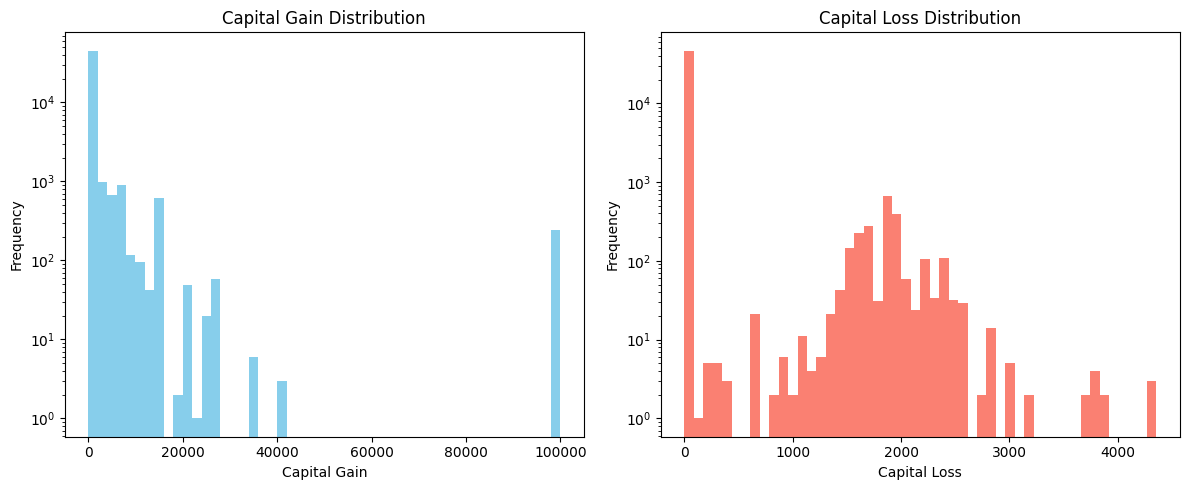

Top capital-gain values:
capital-gain
0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
3325        81
2174        74
10520       64
4650        63
27828       58
4064        54
594         52
3137        51
14084       49
20051       49
Name: count, dtype: int64

Top capital-loss values:
capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
1740       58
1672       50
1741       44
1564       43
2258       39
1719       38
1980       36
1408       35
1669       35
2001       35
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt

# Plot capital-gain distribution (log scale to handle skewness)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df['capital-gain'], bins=50, color='skyblue')
plt.title('Capital Gain Distribution')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale for better visibility of rare high values

plt.subplot(1, 2, 2)
plt.hist(df['capital-loss'], bins=50, color='salmon')
plt.title('Capital Loss Distribution')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.yscale('log')

plt.tight_layout()
plt.show()

# Also, print value counts for the top values to see where to place threshold
print("Top capital-gain values:")
print(df['capital-gain'].value_counts().head(20))

print("\nTop capital-loss values:")
print(df['capital-loss'].value_counts().head(20))


### **Binning Strategy**

To simplify the numerical features and reduce noise from extreme values, we binned capital-gain and capital-loss into three categories: "none" for zero values, "low" for values up to a chosen threshold, and "high" for values above it. Based on data distribution analysis, we selected 7,000 as the threshold for capital-gain and 2,000 for capital-loss. Additionally, we transformed hours-per-week into categorical bins representing work intensity: "part-time" (≤30 hours), "full-time" (31–40 hours), and "overtime" (>40 hours). This binning strategy groups continuous values into meaningful categories, helping reduce noise and improving model interpretability.

In [21]:
import numpy as np


# Copy original dataframe
df_transformed = df.copy()

# Binning hours-per-week
def hours_bin(hours):
    if hours <= 30:
        return 'part-time'
    elif hours <= 40:
        return 'full-time'
    else:
        return 'overtime'

df_transformed['hours-per-week-binned'] = df_transformed['hours-per-week'].apply(hours_bin)

# Binning capital-gain
def capital_gain_bin(gain):
    if gain == 0:
        return 'none'
    elif gain <= 7000:
        return 'low'
    else:
        return 'high'

df_transformed['capital-gain-binned'] = df_transformed['capital-gain'].apply(capital_gain_bin)

# Binning capital-loss
def capital_loss_bin(loss):
    if loss == 0:
        return 'none'
    elif loss <= 2000:
        return 'low'
    else:
        return 'high'

df_transformed['capital-loss-binned'] = df_transformed['capital-loss'].apply(capital_loss_bin)

# Drop original continuous columns
df_transformed = df_transformed.drop(columns=['hours-per-week', 'capital-gain', 'capital-loss'])

# One-hot encode the new binned columns
binned_cols = ['hours-per-week-binned', 'capital-gain-binned', 'capital-loss-binned']
df_transformed = pd.get_dummies(df_transformed, columns=binned_cols)
# Check results
print(df_transformed.shape)
print(df_transformed.head())


(48842, 90)
   age  fnlwgt  education  education-num  income  workclass_Local-gov  \
0   39   77516         12             13       0                False   
1   50   83311         12             13       0                False   
2   38  215646          8              9       0                False   
3   53  234721          6              7       0                False   
4   28  338409         12             13       0                False   

   workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0                   False              False                   False   
1                   False              False                   False   
2                   False               True                   False   
3                   False               True                   False   
4                   False               True                   False   

   workclass_Self-emp-not-inc  ...  native-country_Yugoslavia  \
0                       False  ...                 

### **2 Versions Of Our Dataset**


This step of transforming numerical features into binned categories was considered optional. To evaluate its impact on model performance, we decided to create and retain two versions of the dataset: one with the original continuous numerical features, and another with the binned and encoded versions. This approach allows for a direct comparison to determine which preprocessing strategy yields better results.

In [22]:
df1 = df.copy()
df2 = df_transformed.copy()

### **Splitting the Data**

We will explore one approaches to splitting the dataset for training and testing:

- Perform **random train/test splits** (e.g., 80/20 or 70/30) using `train_test_split` for experimentation and validation.

### **Optional: Addressing Class Imbalance**

If we find that the dataset is imbalanced (e.g., far more samples with income ≤50K than >50K), we may apply techniques to balance the classes:

- **Oversampling** the minority class.
- **Undersampling** the majority class.
- Using synthetic data generation methods like **SMOTE (Synthetic Minority Over-sampling Technique)**.

In [23]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np

# Assuming df1 and df2 include features + target 'income'
X1, y1 = df1.drop(columns='income'), df1['income']
X2, y2 = df2.drop(columns='income'), df2['income']

def generate_splits(X, y, n_splits=10, test_size=0.2, random_state=42):
    raw_splits = []
    over_splits = []
    under_splits = []
    both_splits = []
    
    ros = RandomOverSampler(random_state=random_state)
    rus = RandomUnderSampler(random_state=random_state)
    
    for i in range(n_splits):
        rs = random_state + i  # change seed for diversity
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=rs
        )
        
        # Raw (no sampling)
        raw_splits.append((X_train, X_test, y_train, y_test))
        
        # Oversampling only
        X_over, y_over = ros.fit_resample(X_train, y_train)
        over_splits.append((X_over, X_test, y_over, y_test))
        
        # Undersampling only
        X_under, y_under = rus.fit_resample(X_train, y_train)
        under_splits.append((X_under, X_test, y_under, y_test))
        
        # Both oversampling and undersampling (pipeline)
        # First undersample majority, then oversample minority
        pipeline = Pipeline([('under', rus), ('over', ros)])
        X_both, y_both = pipeline.fit_resample(X_train, y_train)
        both_splits.append((X_both, X_test, y_both, y_test))
    
    return raw_splits, over_splits, under_splits, both_splits

# Generate splits for df1
df1_raw, df1_OverSampling, df1_UnderSampling, df1_BothSampling = generate_splits(X1, y1)

# Generate splits for df2
df2_raw, df2_OverSampling, df2_UnderSampling, df2_BothSampling = generate_splits(X2, y2)

# Example of accessing a split:
# X_train, X_test, y_train, y_test = df1_OverSampling[0]


### **Splitting and sampling Strategy**


We created multiple random 80/20 train-test splits for each dataset version to ensure robust evaluation across different data partitions. To address the class imbalance present in the income target variable, we generated splits under four conditions:

Raw data with no sampling applied,

Oversampling of the minority class,

Undersampling of the majority class, and

Combination of both oversampling and undersampling.

Stratified splitting was used to maintain the original class distribution in each split, ensuring consistent representation of both income classes during training and testing. This approach allows us to compare the impact of different sampling techniques on model performance more reliably.

## **Model Implementation**

In this section, we will implement and evaluate various machine learning models to predict whether an individual's income exceeds $50K based on the features in the dataset. The objective is to confirm and apply machine learning theory learned in class, deepen our understanding of classification models, and identify the most effective approach for this problem.


### **Evaluation Metrics**

All models will be evaluated using key classification metrics to gain a comprehensive view of performance:

- **Accuracy**  
  The proportion of total predictions that are correct. Good for balanced datasets.

- **Precision**  
  The proportion of positive predictions that were actually correct. Important when false positives are costly.

- **Recall**  
  The proportion of actual positives that were correctly predicted. Important when false negatives are costly.

- **F1-Score**  
  The harmonic mean of precision and recall. Useful when you need a balance between precision and recall.

- **ROC AUC Score**  
  Measures the ability of the model to distinguish between classes across different thresholds. A higher score indicates better overall classification performance.


### **Implemented Models**

We will start by implementing the following classification models:

- **Logistic Regression**  
  A simple and interpretable linear model; it's a good baseline for binary classification tasks.

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (you must already have these defined)
datasets = {
    'df1_raw': df1_raw,
    'df1_OverSampling': df1_OverSampling,
    'df1_UnderSampling': df1_UnderSampling,
    'df1_BothSampling': df1_BothSampling,
    'df2_raw': df2_raw,
    'df2_OverSampling': df2_OverSampling,
    'df2_UnderSampling': df2_UnderSampling,
    'df2_BothSampling': df2_BothSampling
}

# Initialize empty list to collect all results
results = []

for name, splits in datasets.items():
    print(f"\n📦 Running Logistic Regression for dataset: {name}")
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        print(f"  🔁 Split {i+1}/10")
        
        # Create pipeline with scaling
        model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }
        print(f"    Metrics: {metrics}")

        results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Show average metrics per dataset
print("\n📊 Average Performance by Dataset:")
print(results_df.groupby('dataset').mean(numeric_only=True).round(4))

# Optional: save to CSV
results_df.to_csv("logistic_results.csv", index=False)



📦 Running Logistic Regression for dataset: df1_raw
  🔁 Split 1/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8507523799774798, 'precision': 0.7298850574712644, 'recall': 0.5975192472198461, 'f1': 0.6571025399811853, 'roc_auc': 0.9034742672219435}
  🔁 Split 2/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8481932644078206, 'precision': 0.7191184008200923, 'recall': 0.6000855431993156, 'f1': 0.6542317556539986, 'roc_auc': 0.9041750975239671}
  🔁 Split 3/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8553587880028662, 'precision': 0.7375449409347714, 'recall': 0.6142001710863987, 'f1': 0.67024504084014, 'roc_auc': 0.9077742778472124}
  🔁 Split 4/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8504452861091207, 'precision': 0.7333688131985099, 'recall': 0.5893926432848589, 'f1': 0.6535451742945222, 'roc_auc': 0.9038559941078683}
  🔁 Split 5/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.847169618179957, 'precision': 0.7199375325351379, 'recall': 0.59153122326

KeyboardInterrupt: 

### **Conclusoes**

falar do que se fez 
falar da pipeline e dizer que diminui muito o tempo de treino

- **Random Forest Classifier**  
  A robust ensemble method that reduces overfitting; chosen for its ability to handle non-linear relationships and mixed feature types.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_raw': df1_raw,
    'df1_OverSampling': df1_OverSampling,
    'df1_UnderSampling': df1_UnderSampling,
    'df1_BothSampling': df1_BothSampling,
    'df2_raw': df2_raw,
    'df2_OverSampling': df2_OverSampling,
    'df2_UnderSampling': df2_UnderSampling,
    'df2_BothSampling': df2_BothSampling
}

# Initialize empty list to collect all results
rf_results = []

for name, splits in datasets.items():
    print(f"\n🌲 Running Random Forest for dataset: {name}")
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        print(f"  🔁 Split {i+1}/10")

        # Initialize Random Forest model
        model = RandomForestClassifier(n_estimators=100, random_state=42)

        # Train model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }
        print(f"    Metrics: {metrics}")

        rf_results.append(metrics)

# Convert results to DataFrame
rf_results_df = pd.DataFrame(rf_results)

# Show average metrics per dataset
print("\n📊 Average Random Forest Performance by Dataset:")
print(rf_results_df.groupby('dataset').mean(numeric_only=True).round(4))

# Optional: save to CSV
rf_results_df.to_csv("random_forest_results.csv", index=False)



🌲 Running Random Forest for dataset: df1_raw
  🔁 Split 1/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8584297266864571, 'precision': 0.7444956477214542, 'recall': 0.6218990590248076, 'f1': 0.6776975064087625, 'roc_auc': 0.9058187621527232}
  🔁 Split 2/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8595557375371071, 'precision': 0.7386363636363636, 'recall': 0.6394354148845167, 'f1': 0.6854653828519028, 'roc_auc': 0.9071572812619182}
  🔁 Split 3/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.852492578564848, 'precision': 0.7225806451612903, 'recall': 0.6227544910179641, 'f1': 0.6689639329198254, 'roc_auc': 0.9022129626208106}
  🔁 Split 4/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.852492578564848, 'precision': 0.7289433384379785, 'recall': 0.6107784431137725, 'f1': 0.6646497556434722, 'roc_auc': 0.9003884209204291}
  🔁 Split 5/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8518783908281298, 'precision': 0.72, 'recall': 0.6236099230111206, 'f1': 0.6683

### **Conclusoes**

- **Gradient Boosting (XGBoost or LightGBM)**  
  A highly accurate boosting algorithm; selected for its strong performance in structured/tabular data and ability to capture complex patterns.


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# List of dataset split arrays (already defined)
datasets = {
    'df1_raw': df1_raw,
    'df1_OverSampling': df1_OverSampling,
    'df1_UnderSampling': df1_UnderSampling,
    'df1_BothSampling': df1_BothSampling,
    'df2_raw': df2_raw,
    'df2_OverSampling': df2_OverSampling,
    'df2_UnderSampling': df2_UnderSampling,
    'df2_BothSampling': df2_BothSampling
}

# Initialize list to collect results
xgb_results = []

for name, splits in datasets.items():
    print(f"\n⚡ Running XGBoost for dataset: {name}")
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        print(f"  🔁 Split {i+1}/10")

        # Initialize XGBoost model
        model = XGBClassifier(eval_metric='logloss', random_state=42)

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Metrics
        metrics = {
            'dataset': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba)
        }
        print(f"    Metrics: {metrics}")

        xgb_results.append(metrics)

# Convert results to DataFrame
xgb_results_df = pd.DataFrame(xgb_results)

# Show average metrics per dataset
print("\n📊 Average XGBoost Performance by Dataset:")
print(xgb_results_df.groupby('dataset').mean(numeric_only=True).round(4))

# Optional: Save to CSV
xgb_results_df.to_csv("xgboost_results.csv", index=False)



⚡ Running XGBoost for dataset: df1_raw
  🔁 Split 1/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8758317125601393, 'precision': 0.7845220030349014, 'recall': 0.6633875106928999, 'f1': 0.7188876013904982, 'roc_auc': 0.9299881694595697}
  🔁 Split 2/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8750127955778483, 'precision': 0.7810770005032712, 'recall': 0.6638152266894782, 'f1': 0.7176878612716763, 'roc_auc': 0.9309147147771474}
  🔁 Split 3/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.872965503122121, 'precision': 0.7714002968827314, 'recall': 0.6668092386655261, 'f1': 0.7153016746960312, 'roc_auc': 0.9290924466310473}
  🔁 Split 4/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8719418568942573, 'precision': 0.7817522032141005, 'recall': 0.6449957228400343, 'f1': 0.7068197797047105, 'roc_auc': 0.9267538802088999}
  🔁 Split 5/10
    Metrics: {'dataset': 'df1_raw', 'accuracy': 0.8674378134916573, 'precision': 0.7621920563097033, 'recall': 0.6484174508126604, 'f1

### **Hyperparameter Tuning and Model Selection (Optional)**

To improve model performance, we may apply:

- **Cross-validation**  
  Using k-fold cross-validation to evaluate model reliability across different data splits.

- **Grid Search or Randomized Search**  
  For systematic tuning of hyperparameters, especially in Random Forest and Gradient Boosting models.


Through this modeling process, we aim to validate theoretical concepts covered in class, enhance practical skills with real-world data, and gain insights into which algorithms are most suitable for income prediction tasks.



### **Optional Models (for Extended Work)**

For further exploration and comparison, the following models may be implemented:

- **Support Vector Machine (SVM)**  
  Effective in high-dimensional spaces; useful for classification with clear margins of separation.

- **K-Nearest Neighbors (KNN)**  
  A simple, instance-based method that can perform well with normalized data and lower dimensions.

- **Neural Network (MLPClassifier)**  
  A basic feed-forward neural network; useful for modeling non-linear relationships in the data.

- **Naive Bayes**  
  Fast and efficient, especially on categorical data; good as a quick baseline for comparison.


In [ ]:
# Fazer o que diz em cima